In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
sns.set(style="white", color_codes=True)
data = pd.read_csv("stock.csv")
print(data)

            Date    Open     High      Low    Close  Volume  OpenInt
0     21-07-2010  24.333  24.3330  23.9460  23.9460   43321        0
1     22-07-2010  24.644  24.6440  24.3620  24.4870   18031        0
2     23-07-2010  24.759  24.7590  24.3140  24.5070    8897        0
3     26-07-2010  24.624  24.6240  24.4490  24.5950   19443        0
4     27-07-2010  24.477  24.5170  24.4310  24.5170    8456        0
...          ...     ...      ...      ...      ...     ...      ...
1560  06-11-2017  57.610  57.7372  57.2285  57.6500   41601        0
1561  07-11-2017  57.290  57.3460  57.1446  57.2850   50935        0
1562  08-11-2017  57.310  57.5500  57.2200  57.4900   71770        0
1563  09-11-2017  57.230  57.2300  56.7100  56.9265   53130        0
1564  10-11-2017  56.960  56.9600  56.3909  56.4000   29233        0

[1565 rows x 7 columns]


In [18]:
print(data.head())

         Date    Open    High     Low   Close  Volume  OpenInt
0  21-07-2010  24.333  24.333  23.946  23.946   43321        0
1  22-07-2010  24.644  24.644  24.362  24.487   18031        0
2  23-07-2010  24.759  24.759  24.314  24.507    8897        0
3  26-07-2010  24.624  24.624  24.449  24.595   19443        0
4  27-07-2010  24.477  24.517  24.431  24.517    8456        0


In [19]:
print(data.tail())

            Date   Open     High      Low    Close  Volume  OpenInt
1560  06-11-2017  57.61  57.7372  57.2285  57.6500   41601        0
1561  07-11-2017  57.29  57.3460  57.1446  57.2850   50935        0
1562  08-11-2017  57.31  57.5500  57.2200  57.4900   71770        0
1563  09-11-2017  57.23  57.2300  56.7100  56.9265   53130        0
1564  10-11-2017  56.96  56.9600  56.3909  56.4000   29233        0


In [20]:
data.shape

(1565, 7)

In [21]:
data.describe()

,Open,High,Low,Close,Volume,OpenInt
count,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.0
mean,36.014550,36.137120,35.855319,35.987517,6452.979553,0.0
std,6.957747,7.002548,6.878264,6.933814,12047.101114,0.0
min,23.936000,23.946000,23.867000,23.946000,2.000000,0.0
25%,29.829000,29.966000,29.819000,29.862000,529.000000,0.0
50%,36.512000,36.571000,36.322000,36.464000,1559.000000,0.0
75%,38.957000,39.123000,38.787000,38.838000,5993.000000,0.0
max,58.620000,58.720000,57.700000,58.430000,106139.000000,0.0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1565 non-null   object 
 1   Open     1565 non-null   float64
 2   High     1565 non-null   float64
 3   Low      1565 non-null   float64
 4   Close    1565 non-null   float64
 5   Volume   1565 non-null   int64  
 6   OpenInt  1565 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 85.7+ KB


In [23]:
data = data.sort_values(by='Date')
print(data)

            Date    Open    High     Low   Close  Volume  OpenInt
130   01-02-2011  29.443  29.443  29.376  29.376    1441        0
327   01-02-2012  28.813  28.823  28.773  28.773   16552        0
480   01-02-2013  32.535  32.535  32.535  32.535     163        0
1133  01-02-2016  35.793  36.187  35.793  35.921   16835        0
1367  01-02-2017  44.347  44.516  43.840  44.168   13348        0
...          ...     ...     ...     ...     ...     ...      ...
112   31-12-2010  28.823  28.997  28.726  28.928   17834        0
459   31-12-2012  30.107  30.107  29.853  29.853     512        0
662   31-12-2013  37.059  37.059  36.532  36.532     944        0
883   31-12-2014  36.687  36.687  36.687  36.687    5158        0
1116  31-12-2015  38.053  38.053  38.053  38.053     220        0

[1565 rows x 7 columns]


In [24]:
X = data[['Open', 'High', 'Low', 'Volume']]  
y = data['Close'] 
print(X)
print(y)

        Open    High     Low  Volume
130   29.443  29.443  29.376    1441
327   28.813  28.823  28.773   16552
480   32.535  32.535  32.535     163
1133  35.793  36.187  35.793   16835
1367  44.347  44.516  43.840   13348
...      ...     ...     ...     ...
112   28.823  28.997  28.726   17834
459   30.107  30.107  29.853     512
662   37.059  37.059  36.532     944
883   36.687  36.687  36.687    5158
1116  38.053  38.053  38.053     220

[1565 rows x 4 columns]
130     29.376
327     28.773
480     32.535
1133    35.921
1367    44.168
         ...  
112     28.928
459     29.853
662     36.532
883     36.687
1116    38.053
Name: Close, Length: 1565, dtype: float64


In [25]:
data.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

Mean Squared Error: 0.021085616108660853


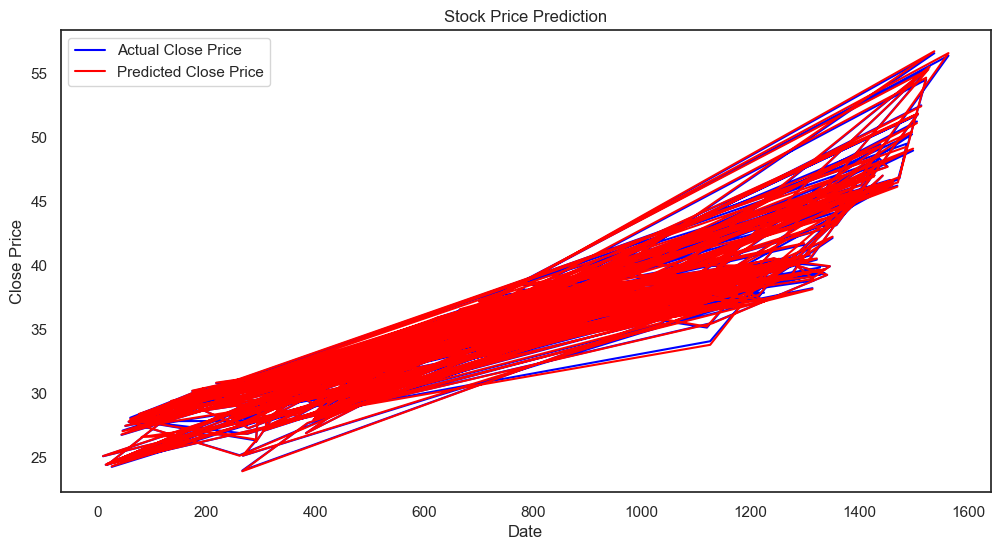

In [27]:
X = data[['Open', 'High', 'Low', 'Volume']]  # You can choose which columns to use as features
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Close Price', color='blue')
plt.plot(y_test.index, predictions, label='Predicted Close Price', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

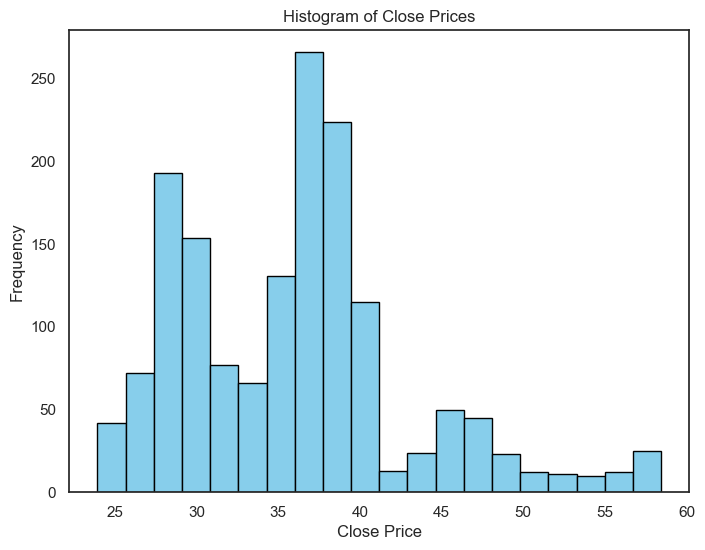

In [28]:
plt.figure(figsize=(8, 6))
plt.hist(data['Close'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()


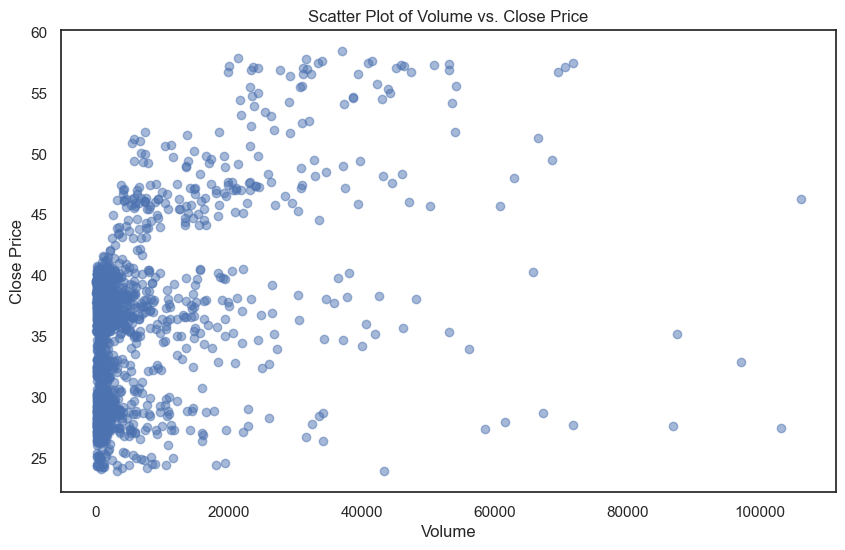

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Volume'], data['Close'], alpha=0.5)
plt.title('Scatter Plot of Volume vs. Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()

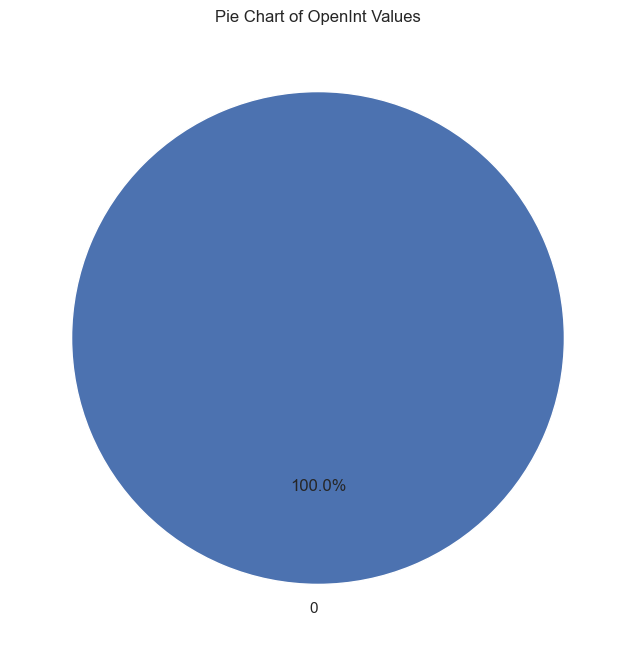

In [39]:
openint_counts = data['OpenInt'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(openint_counts, labels=openint_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of OpenInt Values')
plt.show()

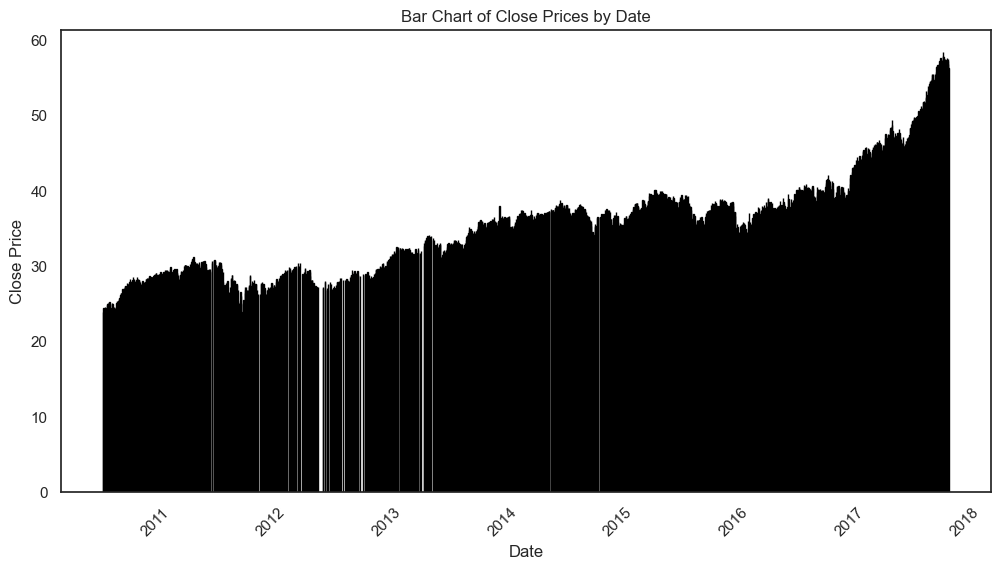

In [41]:
data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")
plt.figure(figsize=(12, 6))
plt.bar(data['Date'], data['Close'], color='skyblue', edgecolor='black')
plt.title('Bar Chart of Close Prices by Date')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

In [42]:
sns.histplot

<function seaborn.distributions.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)>

In [43]:
sns.kdeplot

<function seaborn.distributions.kdeplot(data=None, *, x=None, y=None, hue=None, weights=None, palette=None, hue_order=None, hue_norm=None, color=None, fill=None, multiple='layer', common_norm=True, common_grid=False, cumulative=False, bw_method='scott', bw_adjust=1, warn_singular=True, log_scale=None, levels=10, thresh=0.05, gridsize=200, cut=3, clip=None, legend=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)>

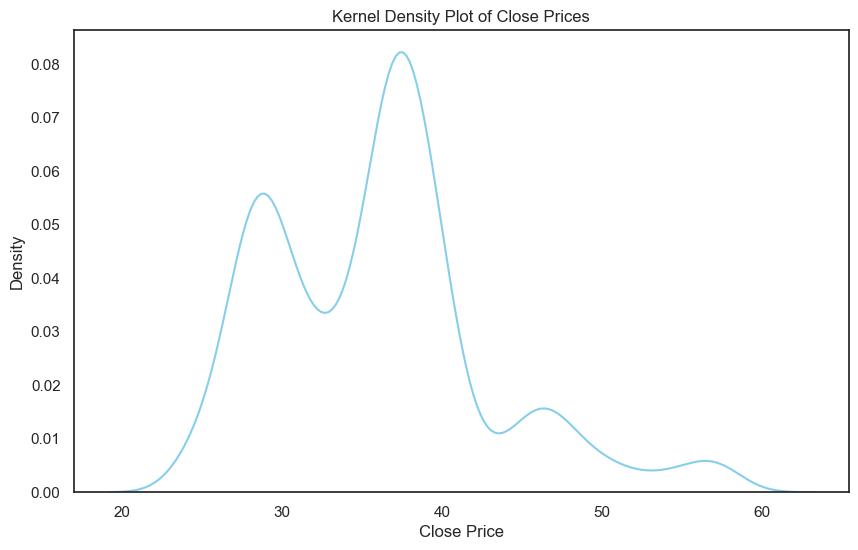

In [44]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Close'], color='skyblue')
plt.title('Kernel Density Plot of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Density')
plt.show()